# TPD and tmp per iteration
Compare TPD per iteration between ANN and EOS

In [1]:
import Stability_and_flash
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
########################################################################################
# INPUTS


# nC4-C10

w = np.array([0.193, 0.49])
Pc = np.array([37.997, 21.1])  # [bar]
Tc = np.array([425.2, 617.6])  # [K]
BIP = np.zeros([2, 2])

NRtol = 1E-12
NRmaxit = 100  # I think 10 is enough
SStol = 1E-10  #
tolSSSA = 1E-10
SSmaxit = 500  # 1000000 # 1E6 might crash my computer.
TolRR = 1E-10
TolXz = 1E-8# Original 1E-8
itSSSAmax = 1E6

phase_num = 1
row_index = 0

#####################################################################################
# Instantiate class
pr = Stability_and_flash.pr()

# Use Model?
pr.useModel = False

# Load models
modelPath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_-10-10__100_4_20_100_20200825-164016',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T620-650_P10-30_100_4_20_100_20200826-174143'
]
pipelinePath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_-10-10__100_4_20_100_20200825-164016\full_pipeline_lnphi_-10-10__512_4_20_300_.pkl',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T620-650_P10-30_100_4_20_100_20200826-174143\full_pipeline_lnphi_nC10_T620-650_P10-30_100_4_20_100_.pkl'
]
pr.load_ANN_model(modelPath, pipelinePath)

Model loading successful.


In [8]:
# Loop T, P, z (or x)
T = 620  # [K] [620, 650]
P = 20.6  # [bar] [10, 30]
z = np.empty(2)
TPD_list = []
z_list = []

pr.tmp_list = []
pr.z_list = []


for z[0] in np.linspace(0.001,0.999,100):
    z[1] = 1-z[0]
    Nc = len(z)
    # More global constants
    Tr = T / Tc
    Pr = P / Pc

    # Get all K-values from Wilson
    K = pr.wilson_corr(Pr, Tr, w)
    ln_K = np.log(K)

    # Get all ai, bi values
    a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

    # Get Vw mixing, part with BIPs and square roots
    Am = pr.Vw(Nc,a_i,BIP)
    ##########################################################################################
    # Stability Analysis
    # Calculate constants ln_phi(z) ln(z[i])

    sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

    # Get TPD
    TPD = -math.log(max(sumXX_list))
    #print('TPD: {}'.format(TPD))
    
    # Save TPD
    TPD_list.append(TPD)
    z_list.append(z[0])

    print('At P = %s bar, and T = %s K' % (P, T))
    if liq_case < 0 or vap_case < 0:
        print('P = %s bar, T = %s K, X= %s' % (P, T, z))
        print('Single phase unstable, TPD = %s' % TPD)
        #print('np.max(abs(XX/z - 1)) > TolXz: {} > {}'.format(np.max(XX/z - -1), TolXz))
        print('Run 2-phase flash.')
        continue # Should not happend here

        phase_num = 2
        # Now call 2-phase flash func. Return only converged composition. Optimize by re-using calculated
        # variables.

        liq_comp, vap_comp = pr.two_phase_flash_iterate()
        print('liq and vap comp:')
        print(liq_comp, vap_comp)


    elif liq_case > 0 and vap_case > 0:
        continue
        print('Single phase stable')
        print('P = %s bar, T = %s K, X= %s' % (P, T, z))
        print('Liq case: %d, Vap case: %d' % (liq_case, vap_case))
        # Copy single phase composition

    print('=====================')


At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 20.6 bar, and T = 620 K
At P = 2

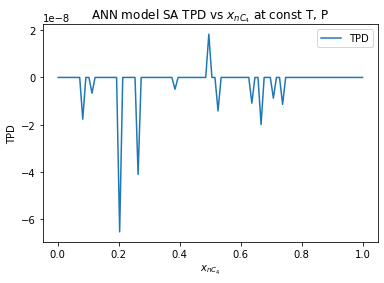

In [6]:
# ANN Case
# Plot TPD vs z at const T, P
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z_list, TPD_list, label='TPD')
ax.set_xlabel(r'$x_{nC_4}$')
ax.set_ylabel('TPD')
#ax.set_yscale('log')
ax.set_title(r'ANN model SA TPD vs $x_{nC_4}$ at const T, P')
ax.legend()
plt.show()

# Note: Each negative TPD corresponded to an 'unstable' phase

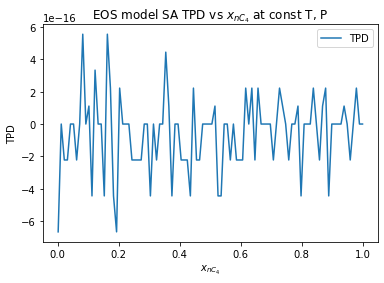

In [9]:
# EOS Case
# Plot TPD vs z at const T, P
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z_list, TPD_list, label='TPD')
ax.set_xlabel(r'$x_{nC_4}$')
ax.set_ylabel('TPD')
#ax.set_yscale('log')
ax.set_title(r'EOS model SA TPD vs $x_{nC_4}$ at const T, P')
ax.legend()
plt.show()

In [ ]:
## Plot abs(XX/z - 1)

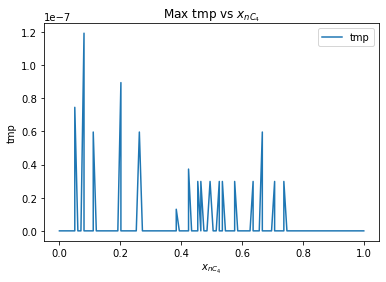

In [6]:
## ANN
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pr.z_list, pr.tmp_list, label='tmp')
ax.set_xlabel(r'$x_{nC_4}$')
ax.set_ylabel('tmp')
ax.set_title(r'Max tmp vs $x_{nC_4}$')
ax.legend()
plt.show()

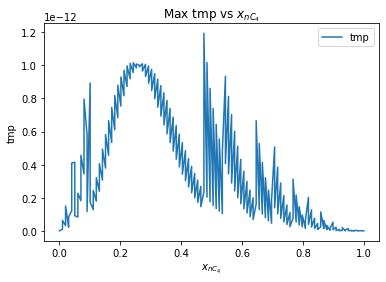

In [9]:
## EOS
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pr.z_list, pr.tmp_list, label='tmp')
ax.set_xlabel(r'$x_{nC_4}$')
ax.set_ylabel('tmp')
ax.set_title(r'Max tmp vs $x_{nC_4}$')
ax.legend()
plt.show()